<a href="https://colab.research.google.com/github/Zhoucy1/fupo-handicrafts-site/blob/main/activity_4_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- notebook created by Yves Lacroix
- hollowed out by Adedotun Adeboye
- confirmed by Yves Lacroix

In [ ]:
#mount your google drive containing necessary materials for session
from google.colab import drive
drive.mount('/content/drive')
#copy the path to the file "drive->MyDrive->BIBA_2025->activities_md->activity_4.md"
#then open it with "open" and print the rstripped lines out so as to collect your markdown code
with open("/content/drive/MyDrive/AI/Notebooks/activity_4_practice.ipynb", "r") as file:
    for line in file:
        print(line.rstrip())
#import time to time your notebook complete execution and initiate a timer called notebook_start_time
import time
notebook_start_time = time.time()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{"cells":[{"cell_type":"markdown","source":["- notebook created by Yves Lacroix\n","- hollowed out by Adedotun Adeboye\n","- confirmed by Yves Lacroix"],"metadata":{"id":"R946KKu1Sd5r"}},{"cell_type":"code","execution_count":null,"metadata":{"id":"M-7iR-Etw2Am"},"outputs":[],"source":["#mount your google drive containing necessary materials for session\n","from google.colab import drive\n","drive.mount('/content/drive')\n","#copy the path to the file \"drive->MyDrive->BIBA_2025->activities_md->activity_4.md\"\n","#then open it with \"open\" and print the rstripped lines out so as to collect your markdown code\n","with open(\"/content/drive/MyDrive/activities_md-20250721T083520Z-1-001/activities_md/activity_4.md\", \"r\") as file:\n","    for line in file:\n","        print(line.rstrip())\n","#import time to time your notebook complete execution and initiate a

In [ ]:
#import most standard libraries pandas, numpy, matplotlib.pyplot ansd seaborn as respectively pd, np, plt and sns
#import also time for printing out the complete execution time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TASK - import dataset "churn_world_of_warcraft_with_nans.csv" and head it

In [ ]:
# TASK - import dataset "churn_world_of_warcraft_with_nans.csv" and head it
df = pd.read_csv("/content/drive/MyDrive/AI/Notebooks/churn_world_of_warcraft_with_nans.csv")
display(df.head())

,char_id,guild,total_timestamps,unique_days,max_level,min_month,max_month,Average_Hour,Average_Playing_density,Playing_after_6_months
0,2.0,1.0,1.0,1.0,18.0,12.0,12.0,0.166667,0.032787,0.0
1,7.0,1.0,655.0,50.0,71.0,1.0,12.0,2.183333,0.136612,1.0
2,9.0,1.0,2739.0,133.0,70.0,1.0,6.0,3.432331,0.726776,NaN
3,10.0,0.0,674.0,49.0,61.0,7.0,11.0,2.292517,0.321311,0.0
4,19.0,1.0,3001.0,149.0,70.0,1.0,12.0,3.356823,0.407104,1.0


### Missing value detection and counts

In [ ]:
# TASK - compute nan counts, percentages, generate a dataframe with these counts, and show it with appropriate head()
#percentages computed below
percentages=(100*df.isna().sum()/df.shape[0]).round(2).apply(lambda x:str(x)+'%')
nan_counts = pd.DataFrame({'counts': df.isna().sum(), 'percentages': percentages})
display(nan_counts.head())

,counts,percentages
char_id,1837,4.92%
guild,1877,5.02%
total_timestamps,1887,5.05%
unique_days,1926,5.16%
max_level,1843,4.93%


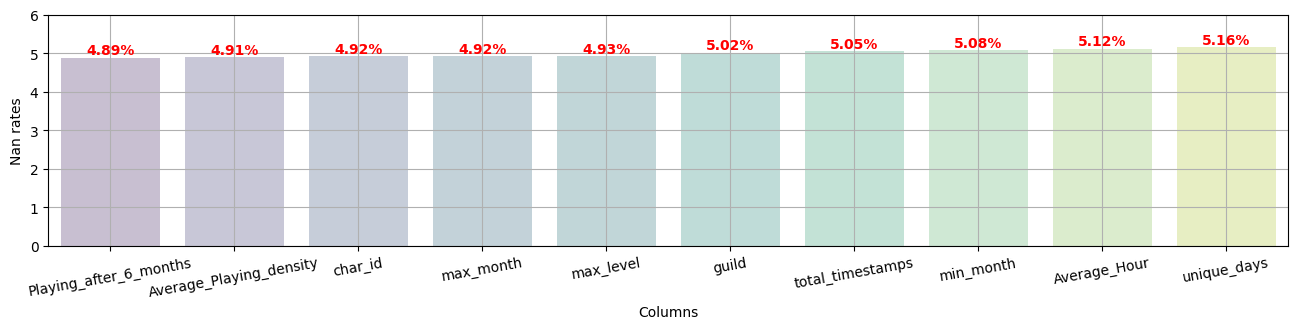

In [ ]:
#barplot nan percentages in ascending order per columns, using sns, and annotate the bars
plt.figure(figsize=(16,3))
# Sort the DataFrame by the 'percentages' column in ascending order
nan_counts_sorted = nan_counts.sort_values(by='percentages')
ax = sns.barplot(data=nan_counts_sorted,
            x=nan_counts_sorted.index,
            y=nan_counts_sorted['percentages'].apply(lambda x:float(x[:-1])),
            hue=nan_counts_sorted.index,
            palette='viridis',alpha=0.3)
plt.xticks(rotation=10)
plt.grid('minor')
plt.xlabel("Columns")
plt.ylabel("Nan rates")

# Annotate bars with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=10, color='red', fontweight='bold')
plt.ylim([0,6])
plt.show()

### Strategies for dropping Nans

In [ ]:
# TASK - create a dictionary dfs to store the transformed dataframes vs dropna methods (the steps below will guide you) and discuss!

#drop rows containing nans and store in a dataframe named "df_drop_rows_with_nans"
df_drop_rows_with_nans = df.dropna()

#drop columns containing nans, store in "df_drop_cols_with_nans"
df_drop_cols_with_nans = df.dropna(axis=1)

#drop completely empty rows, store in "df_drop_full_nan_rows"
df_drop_full_nan_rows = df.dropna(how='all')

#drop rows containing more than a null count threshold :
# Let's set a threshold, for example, drop rows with more than 3 missing values
threshold_rows = 3
df_drop_rows_threshold = df.dropna(thresh=len(df.columns) - threshold_rows)


#drop columns containing more than a null count rate
# Let's set a rate threshold, for example, drop columns with more than 10% missing values
threshold_rate_cols = 0.1
bad_cols = nan_counts[nan_counts['percentages'].apply(lambda x: float(x[:-1]) / 100) > threshold_rate_cols].index.tolist()

# Print out the list of columns identified as 'bad_cols' (these are the columns with high missing values)
print(f"Columns with more than {threshold_rate_cols*100}% missing values: {bad_cols}")

# Create a new DataFrame by dropping the 'bad_cols' from the original DataFrame
df_drop_cols_threshold = df.drop(columns=bad_cols)

# Store this cleaned DataFrame in a dictionary 'dfs' with the key 'drop_cols_threshold'
dfs = {
    'drop_rows_with_nans': df_drop_rows_with_nans,
    'drop_cols_with_nans': df_drop_cols_with_nans,
    'drop_full_nan_rows': df_drop_full_nan_rows,
    'drop_rows_threshold': df_drop_rows_threshold,
    'drop_cols_threshold': df_drop_cols_threshold
}

Columns with more than 10.0% missing values: []


In [ ]:
#format print items() of dictionary dfs so as to observe the effects of diffrent droping nans methods on information loss
for key,data in dfs.items():
  print(f"{key} dataframe has shape {data.shape}")

drop_rows_with_nans dataframe has shape (22383, 10)
drop_cols_with_nans dataframe has shape (37354, 0)
drop_full_nan_rows dataframe has shape (37354, 10)
drop_rows_threshold dataframe has shape (37313, 10)
drop_cols_threshold dataframe has shape (37354, 10)


### NaN Imputation Methods (demonstrated with titanic_train.csv and a custom function)

In [ ]:
# TASK - import titanic dataset and head it
titanic = pd.read_csv("/content/drive/MyDrive/AI/Datasets/titanic_train.csv")
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# TASK - compute the total number of nans contained in the dataset and print it out
total_nans = titanic.isnull().sum().sum()
print(f"Total number of NaNs in the titanic dataset: {total_nans}")

Total number of NaNs in the titanic dataset: 866


In [ ]:
# Task - create a dataframe called description for the titanic dataset that summarizes dtypes, nan counts, nan rates, and nunique, head it
description = pd.DataFrame({
    'dtype': titanic.dtypes,
    'nan_count': titanic.isnull().sum(),
    'nan_rate': (titanic.isnull().sum()/len(titanic))*100,
    'nunique': titanic.nunique()
})
display(description.head())

,dtype,nan_count,nan_rate,nunique
PassengerId,int64,0,0.0,891
Survived,int64,0,0.0,2
Pclass,int64,0,0.0,3
Name,object,0,0.0,891
Sex,object,0,0.0,2


In [ ]:
# TASK - Replace missing values and discuss meaningfulness of chosen method per column
#Filling in with fixed values chosen by column, eventually adapted to sub-categories
# first make a copy of the original data
titanic_fillna_fix=titanic.copy()

#--for column age, fill in missing values by age means by sex and Pclass using the groupby method
#this somehow should preserve some consistency in the data

#For cabin, we should first explore the non null values found in the column cabin
cabin_values=sorted(titanic_fillna_fix.Cabin.dropna().unique())[:20]

#--now, print the first 20 non null values of cabin

#This suggest we might first transform the Cabin variable so as to only preserve the first letter

#print out the unique values found in Cabin feature

#--and print the sorted values of cabin after keeping only the first letter

# replace the cabin values by there first letter, and nans by the letter "X"


In [ ]:
# TASK - Check if nans remain in titanic_fillna_fix

In [ ]:
# Create a new copy of the titanic dataset and fill missing values by using methods back fill and forward fill
#(find out how these methods are called in pandas)

In [ ]:
#again a new copy of titanic, and try to replace missing values in each column by the most frequent value of the column.

**Advanced Imputation with Scikit-learn:**
These methods apply algorithms so as to replace missing values by values appearing elsewhere or numerically (if numerical) consistent with other data, so that samples generated somehow are "consistent" with the other observed samples. So an algorithm (different algorithms are available) decides for you which value to fill in with a missing one, sample by sample.

- Utilize `KNNImputer` (K-Nearest Neighbors based imputation).
- Utilize `IterativeImputer` (MICE - Multiple Imputation by Chained Equations).
- Apply `StandardScaler` before advanced imputation and `inverse_transform` afterwards to maintain the original scale. Pay attention : separate text cols keep them as they are, they are treated by different methods.


In [ ]:
#Import libraries for imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
# TASK
#we generate a dataframe titanic1 (copy of original data) where Sex is mapped to 0,1, Cabin is reduced to first letter

#we then generate a description1 dataframe as before to summarize counts (unique, missing, rates of missing) and dtypes of titanic 1, and head it


,dtype,nan_count,nan_rate,nunique
PassengerId,int64,0,0.0,891
Survived,int64,0,0.0,2
Pclass,int64,0,0.0,3
Name,object,0,0.0,891
Sex,int64,0,0.0,2


In [ ]:
# TASK - Discussion (one hot encoding)
#We observe that in object cols, some seem categorical (low number of unique values),
#while others are clearly text (e.g. 'Name')
#we decide to declare as categorical those columns that have less than 10 unique values and are object (this is arbitrary, decision involves the data operator)
# generate the list of so selected categorical columns and store it in a variable named "cat_cols"
cat_cols = description[
    (description['dtype'] == 'object') & (description['nunique'] < 10)
].index.tolist()

#Those cat_cols will be one hot encoded with get_dummies, with drop_first=true to avoid colinearity
#We generate the get_dummies on cat_cols, and then work with a dataset titanic_num which is purely numerical (multiply the dummies by 1 to pass from bool to int),
#by concatenating the sub-dataset of titanic1 consisting of non object columns, with the generated dataset by the get-dummies procedure. Call it "titanic_num", head it
titanic_cat_encoded = pd.get_dummies(titanic1[cat_cols], drop_first=True).astype(int)
titanic_num = pd.concat([titanic1.select_dtypes(exclude='object'), titanic_cat_encoded], axis=1)
display(titanic_num.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,1,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [ ]:
# TASK - Discussion (imputation)

#Before imputation we scale the numerical titanic_num with StandardScaler (import your scaler!), with output format a dataframe
scaler=StandardScaler()
titanic_num_scaled=pd.DataFrame(scaler.fit_transform(titanic_num),columns=titanic_num.columns)
#next we apply our imputers  and generate 3 dataframes named "titanic_knn", "titanic_mice", and "titanic_mean", by applying respectively
# our three imputers KNNImputer, IterativeImputer, SimpleImputer with mean as strategy : use magic command "%time" on each line to print out the computation time for each method.
%time knn_imputer = KNNImputer()
titanic_knn = pd.DataFrame(knn_imputer.fit_transform(titanic_num_scaled), columns=titanic_num_scaled.columns)

%time mice_imputer = IterativeImputer()
titanic_mice = pd.DataFrame(mice_imputer.fit_transform(titanic_num_scaled), columns=titanic_num_scaled.columns)

%time mean_imputer = SimpleImputer(strategy='mean')
titanic_mean = pd.DataFrame(mean_imputer.fit_transform(titanic_num_scaled), columns=titanic_num_scaled.columns)

CPU times: user 18 µs, sys: 2 µs, total: 20 µs
Wall time: 22.6 µs
CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 33.6 µs
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 13.6 µs


In [ ]:
# TASK (Discussion on imputation methods and when to apply them)
#Next to our 3 numerical imputed dataframes we apply the scaler's inverse_transform method with output of DataFrame type
titanic_knn_inv = pd.DataFrame(scaler.inverse_transform(titanic_knn), columns=titanic_knn.columns)
titanic_mice_inv = pd.DataFrame(scaler.inverse_transform(titanic_mice), columns=titanic_mice.columns)
titanic_mean_inv = pd.DataFrame(scaler.inverse_transform(titanic_mean), columns=titanic_mean.columns)

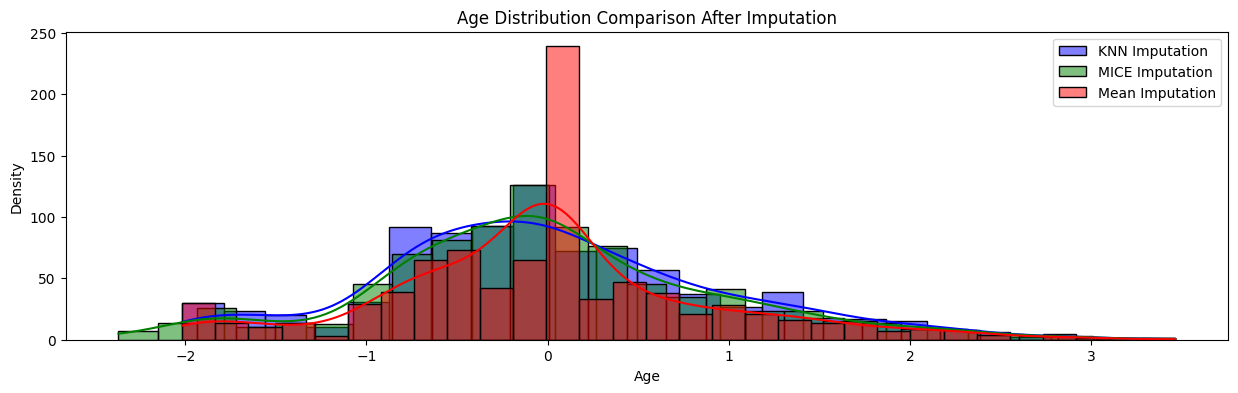

In [ ]:
# TASK - Complete the code
#Next since in titanic1_num we had missing values in Age and Cabins, we will make hist plots for Age variable counts of our three imputed
#freshly issued dataframes titanic_knn, titanic_mice, titanic_mean, and compare visualy
plt.figure(figsize=(15,4))

sns.histplot(titanic_knn['Age'], kde=True, color='blue', label='KNN Imputation',alpha=0.5)
#following the sample for titanic_knn, allocate colours to mice (green) and simple (red) imputers
sns.histplot(titanic_mice['Age'], kde=True, color='green', label='MICE Imputation',alpha=0.5)
sns.histplot(titanic_mean['Age'], kde=True, color='red', label='Mean Imputation',alpha=0.5)

plt.title('Age Distribution Comparison After Imputation')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
#print out the complete execution time of notebook in mn$inutes and seconds
elapsed=time.time()-notebook_start_time
print(f"Complete notebook execution took {int(elapsed//60)} minutes and {round(elapsed%60,2)} seconds.")

Complete notebook execution took 7 minutes and 19.8 seconds.
